# New Section

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:

IMAGE_SIZE = 224
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(224,224, 3), include_top=False)
pretrained_model.trainable = False

model = tf.keras.Sequential([
            pretrained_model,
           tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = "relu"),
            
            tf.keras.layers.Dense(2, activation = "softmax")
])

29097984/29084464 [==============================] - 0s 0us/step


In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
# Train from scratch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML Project Data/Unzipped_data/chest_xray/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [9]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/ML Project Data/Unzipped_data/chest_xray/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 16 images belonging to 2 classes.


In [10]:
test_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/ML Project Data/Unzipped_data/chest_xray/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 624 images belonging to 2 classes.


In [12]:
hist = model.fit(train_generator,steps_per_epoch=10 ,epochs=10, validation_data=test_generator) 


Epoch 1/10
10/10 [==============================] - 429s 45s/step - loss: 13.4182 - accuracy: 0.6469 - val_loss: 3.9439 - val_accuracy: 0.6266
Epoch 2/10
10/10 [==============================] - 216s 22s/step - loss: 0.4238 - accuracy: 0.8625 - val_loss: 1.7508 - val_accuracy: 0.7083
Epoch 3/10
10/10 [==============================] - 218s 22s/step - loss: 0.3977 - accuracy: 0.8875 - val_loss: 0.6190 - val_accuracy: 0.8397
Epoch 4/10
10/10 [==============================] - 227s 23s/step - loss: 0.1638 - accuracy: 0.9344 - val_loss: 0.4447 - val_accuracy: 0.8638
Epoch 5/10
10/10 [==============================] - 207s 21s/step - loss: 0.2013 - accuracy: 0.9375 - val_loss: 0.4563 - val_accuracy: 0.8574
Epoch 6/10
10/10 [==============================] - 204s 21s/step - loss: 0.1649 - accuracy: 0.9344 - val_loss: 0.2921 - val_accuracy: 0.8990
Epoch 7/10
10/10 [==============================] - 195s 19s/step - loss: 0.1577 - accuracy: 0.9281 - val_loss: 0.4292 - val_accuracy: 0.8654
Epoch

**Model Image**

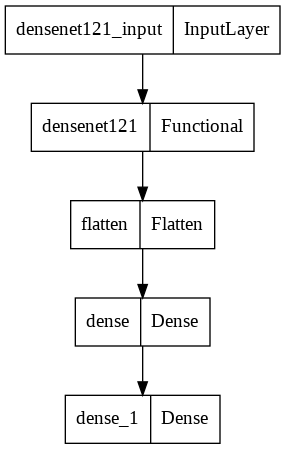

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='xray-resnet50.png')

**Model Summary**

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 13,460,418
Trainable params: 6,422,914
Non-trainable params: 7,037,504
_________________________________________________________________


**Val Accuracy and Loss Graph**

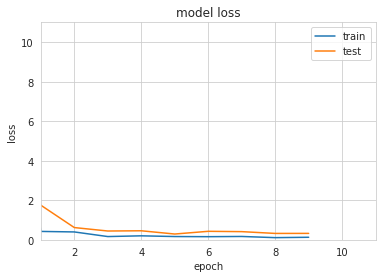

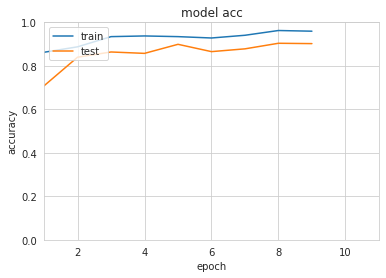

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.xlim(1, 11)
plt.ylim(0, 11)
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim(1, 11)
plt.ylim(0, 1)
plt.show()

**Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(test_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes =test_generator.classes
cf = confusion_matrix(true_classes,pred)
cf


array([[191,  43],
       [ 18, 372]])

**Confusion Matrix Image**

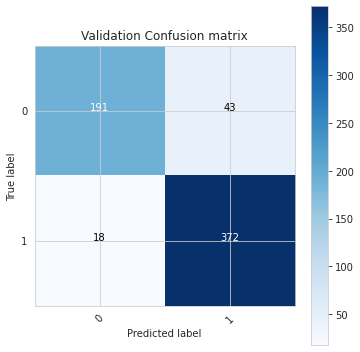

In [18]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Validation Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = range(2))

In [19]:
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       234
           1       0.90      0.95      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



**Test Losss and accuracy graph**

In [20]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes = validation_generator.classes
cf = confusion_matrix(true_classes,pred)
cf

array([[6, 2],
       [0, 8]])

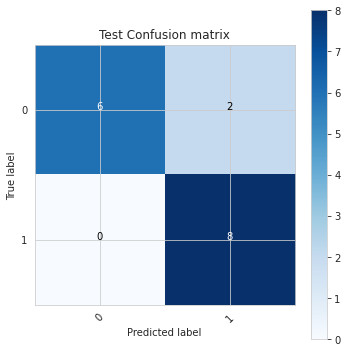

In [21]:
# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Test Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = range(2))

In [22]:
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.80      1.00      0.89         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16

